In [101]:
# Librairies et fonctions

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [102]:
# Fonction pour générer des données aléatoires pour chaque variable
def generate_data(num_samples):
    data = []
    
    # Génération des données pour l'échantillon
    for _ in range(num_samples):
        # Unité de formation et de recherche (UFR) de l'étudiant : 
        ufr = random.choice(["ST", "SEG", "LSH"])  # ST = Sciences et Technologies, SEG = Sciences Economiques et de Gestion, LSH = Lettres et Sciences Humaines

        # Filière spécifique de l'étudiant :
        filiere = random.choice(["MPCI", "SVT", "SEG", "Geographie", "LM", "HA", "Philo"])

        # Sexe de l'étudiant :
        sexe = random.choice(["Masculin", "Feminin"])

        # Niveau académique de l'étudiant :
        niveau = random.choice(["L1", "L2", "L3"])  # L1 = 1ère année de Licence, L2 = 2ème année, L3 = 3ème année

        # Fréquence d'utilisation de la connexion gratuite :
        frequency = random.choice(["Quotidienne", "Hebdomadaire", "Occasionnelle"])

        # Durée moyenne que chaque étudiant passe en ligne à chaque session, variant de 5 à 300 minutes
        duration = random.randint(5, 300)

        # Impact de la connexion sur la motivation de l'étudiant :
        motivation_impact = random.choice(["Augmenté", "Inchangé", "Diminué"])

        # La note moyenne actuelle pour évaluer la performance académique
        moyenne = random.uniform(3.50, 17.50)

        # Moyenne académique de l'étudiant avant l'accès à la connexion gratuite
        moyenne_passe = random.uniform(3.50, 17.00)

        # Moyenne académique de l'étudiant après avoir accès à la connexion gratuite (3.5 à 17.0) :
        # Cette moyenne actuelle permet d'évaluer l'impact de la connexion sur la réussite académique
        moyenne_present = random.uniform(3.50, 17.00)

        # Nombre d'heures d'étude par semaine en dehors de la connexion :
        study_hours = random.randint(1, 30)

        # Principal usage de la connexion gratuite :
        site = random.choice(["Réseaux sociax", "Recherche", "Autres"])

        # Statut de réussite :
        satut = random.choice([1, 0])

        # Ajout des données générées dans une liste de données
        data.append([ufr, filiere, sexe, niveau, frequency, duration, motivation_impact, moyenne, moyenne_passe, moyenne_present, study_hours, site, satut])

    # Création du DataFrame avec Pandas
    # Ce DataFrame contiendra toutes les données de l'échantillon, avec des colonnes représentant chaque variable
    df = pd.DataFrame(data, columns=[
        "UFR", "Filière", "Sexe", "Niveau", "Fréquence d'utilisation", 
        "Durée par session (min)", "Impact sur la motivation", "Moyenne des notes", 
        "Moyenne avant l'accès", "Moyenne actuelle", "Temps d'étude/semaine (h)", 
        "Usage de la connexion", "Statut de réussite"
    ])

    return df

# Génération de 1000 échantillons de données
df = generate_data(2000)

# Exportation vers un fichier CSV
df.to_csv("donnees_simulees.csv", index=False)

# Affichage des premières lignes pour vérifier
df.head()


,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne des notes,Moyenne avant l'accès,Moyenne actuelle,Temps d'étude/semaine (h),Usage de la connexion,Statut de réussite
0,SEG,HA,Feminin,L3,Occasionnelle,179,Augmenté,7.131486,10.186278,16.147228,7,Réseaux sociax,1
1,ST,SVT,Feminin,L2,Quotidienne,145,Diminué,3.547731,12.618552,16.408861,11,Réseaux sociax,1
2,LSH,HA,Masculin,L2,Quotidienne,10,Augmenté,15.392803,4.821351,12.657355,8,Autres,1
3,SEG,MPCI,Masculin,L2,Occasionnelle,245,Augmenté,11.010319,5.627384,7.837539,21,Réseaux sociax,1
4,SEG,MPCI,Masculin,L2,Occasionnelle,36,Augmenté,9.919945,5.524963,4.105976,30,Autres,0


In [103]:
df = pd.read_csv('donnees_simulees.csv')
df.head()

,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne des notes,Moyenne avant l'accès,Moyenne actuelle,Temps d'étude/semaine (h),Usage de la connexion,Statut de réussite
0,SEG,HA,Feminin,L3,Occasionnelle,179,Augmenté,7.131486,10.186278,16.147228,7,Réseaux sociax,1
1,ST,SVT,Feminin,L2,Quotidienne,145,Diminué,3.547731,12.618552,16.408861,11,Réseaux sociax,1
2,LSH,HA,Masculin,L2,Quotidienne,10,Augmenté,15.392803,4.821351,12.657355,8,Autres,1
3,SEG,MPCI,Masculin,L2,Occasionnelle,245,Augmenté,11.010319,5.627384,7.837539,21,Réseaux sociax,1
4,SEG,MPCI,Masculin,L2,Occasionnelle,36,Augmenté,9.919945,5.524963,4.105976,30,Autres,0


## Analyse de la forme

In [104]:
# Nombre de ligne et colone
df.shape

(2000, 13)

In [105]:
# Type de variable
df.dtypes.value_counts()

object     7
int64      3
float64    3
Name: count, dtype: int64

<Axes: >

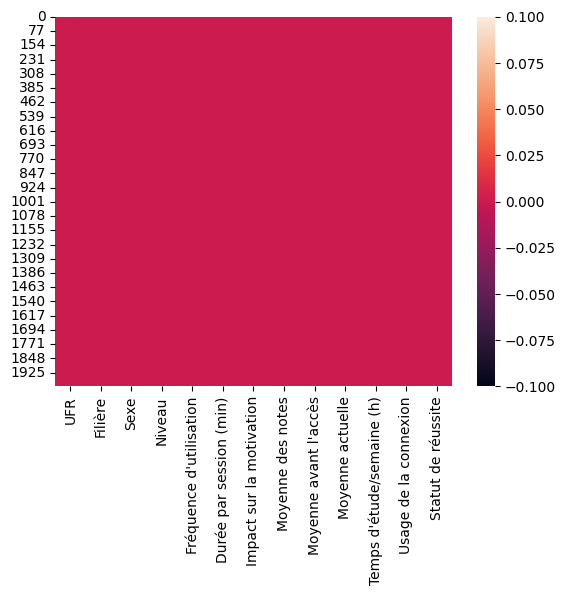

In [106]:
# Les valeurs manquante
sns.heatmap(df.isna())

In [107]:
# Examen de la variable cible
df['Statut de réussite'].value_counts(normalize=True)

Statut de réussite
1    0.506
0    0.494
Name: proportion, dtype: float64

## Analyse du fond

C:\Users\Ramzy Mr 17\AppData\Local\Temp\ipykernel_7992\2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Ramzy Mr 17\AppData\Local\Temp\ipykernel_7992\2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Ramzy Mr 17\AppData\Local\Temp\ip

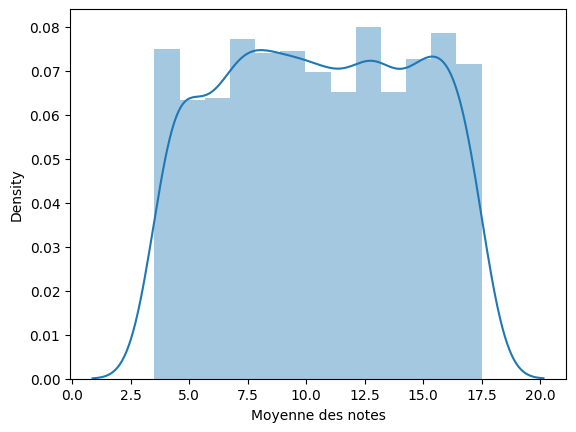

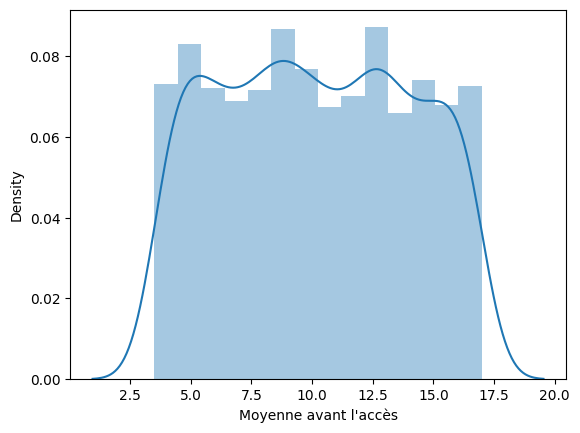

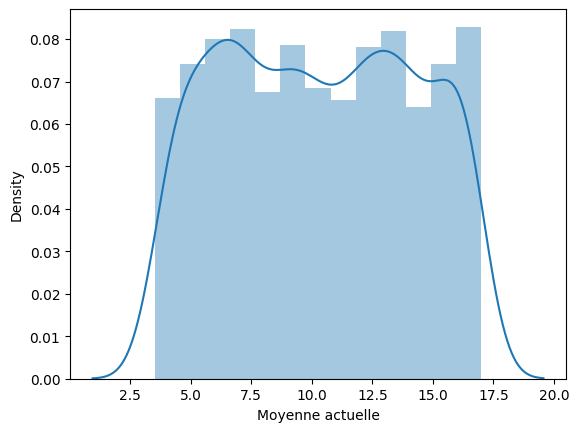

In [108]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [109]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

UFR----------------------------------------------- ['SEG' 'ST' 'LSH']
Filière------------------------------------------- ['HA' 'SVT' 'MPCI' 'Geographie' 'LM' 'SEG' 'Philo']
Sexe---------------------------------------------- ['Feminin' 'Masculin']
Niveau-------------------------------------------- ['L3' 'L2' 'L1']
Fréquence d'utilisation--------------------------- ['Occasionnelle' 'Quotidienne' 'Hebdomadaire']
Impact sur la motivation-------------------------- ['Augmenté' 'Diminué' 'Inchangé']
Usage de la connexion----------------------------- ['Réseaux sociax' 'Autres' 'Recherche']


## Relation Target / Variables

### Relation Target / UFR

<Axes: xlabel='UFR', ylabel='count'>

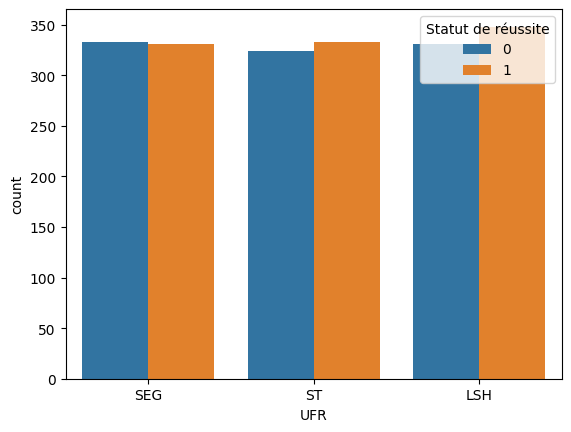

In [110]:
sns.countplot(x='UFR', hue='Statut de réussite', data=df)


<Axes: xlabel='UFR', ylabel='Statut de réussite'>

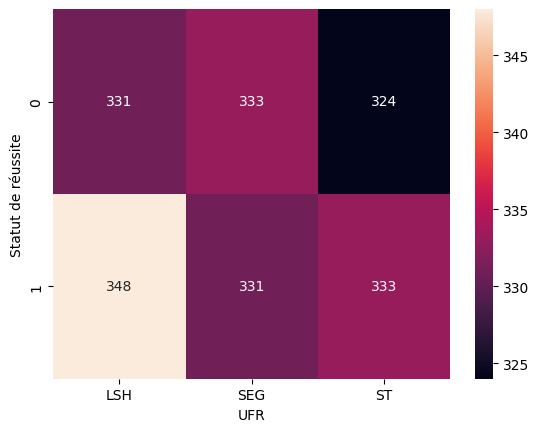

In [111]:
plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df['UFR']), annot=True, fmt='d')

### Relation Target / Filière

<Axes: xlabel='Filière', ylabel='count'>

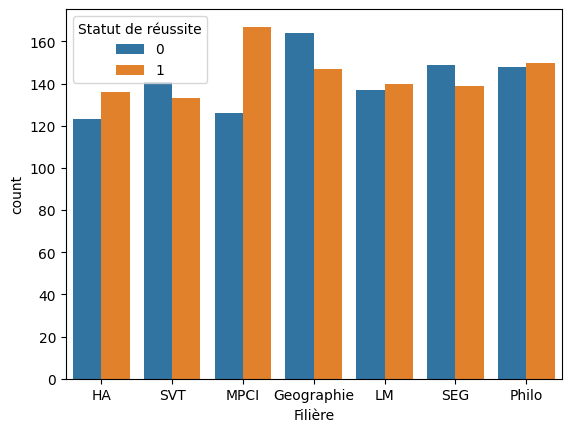

In [112]:
sns.countplot(x='Filière', hue='Statut de réussite', data=df)

### Relation Target / Niveau

<Axes: xlabel='Niveau', ylabel='count'>

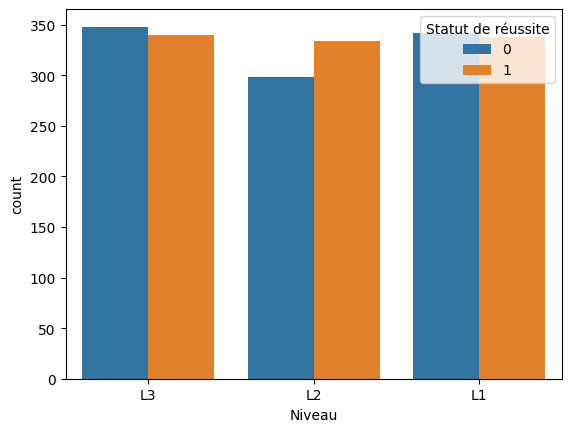

In [113]:
sns.countplot(x='Niveau', hue='Statut de réussite', data=df)

<Axes: xlabel='Niveau', ylabel='Statut de réussite'>

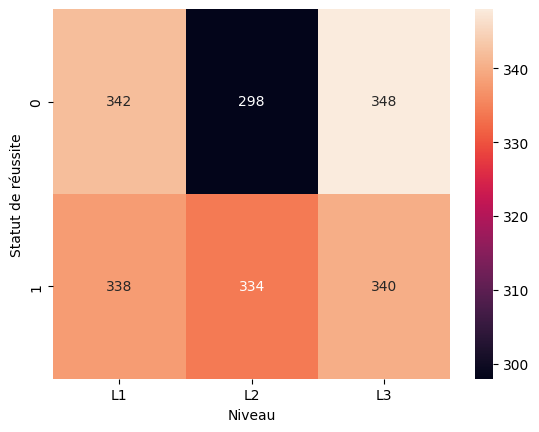

In [114]:
plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df['Niveau']), annot=True, fmt='d')

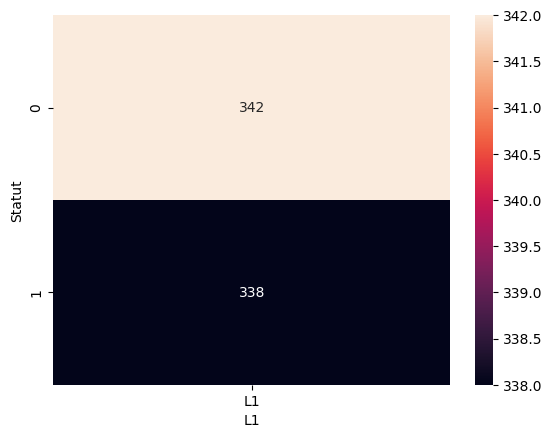

In [115]:
# Filtrer le DataFrame pour inclure uniquement les données de l'année 2011 dans la colonne 'Annee_BAC'
filtered_df = df[df['Niveau'].astype(str).str.startswith('L1')]

# Créer la heatmap basée sur la table de contingence
plt.figure()
sns.heatmap(pd.crosstab(filtered_df['Statut de réussite'], filtered_df['Niveau']), annot=True, fmt='d')
plt.xlabel('L1')
plt.ylabel('Statut')
plt.show()

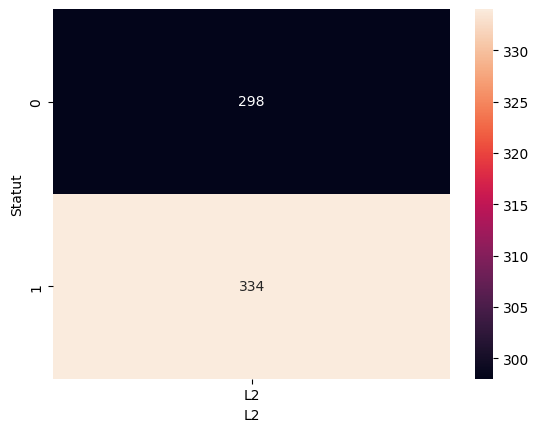

In [116]:
# Filtrer le DataFrame pour inclure uniquement les données de l'année 2011 dans la colonne 'Annee_BAC'
filtered_df = df[df['Niveau'].astype(str).str.startswith('L2')]

# Créer la heatmap basée sur la table de contingence
plt.figure()
sns.heatmap(pd.crosstab(filtered_df['Statut de réussite'], filtered_df['Niveau']), annot=True, fmt='d')
plt.xlabel('L2')
plt.ylabel('Statut')
plt.show()

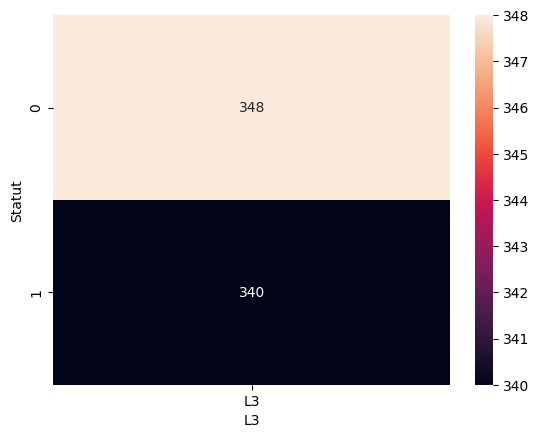

In [117]:
# Filtrer le DataFrame pour inclure uniquement les données de l'année 2011 dans la colonne 'Annee_BAC'
filtered_df = df[df['Niveau'].astype(str).str.startswith('L3')]

# Créer la heatmap basée sur la table de contingence
plt.figure()
sns.heatmap(pd.crosstab(filtered_df['Statut de réussite'], filtered_df['Niveau']), annot=True, fmt='d')
plt.xlabel('L3')
plt.ylabel('Statut')
plt.show()

### Relation Target / Fréquence d'utilisation

<Axes: xlabel="Fréquence d'utilisation", ylabel='count'>

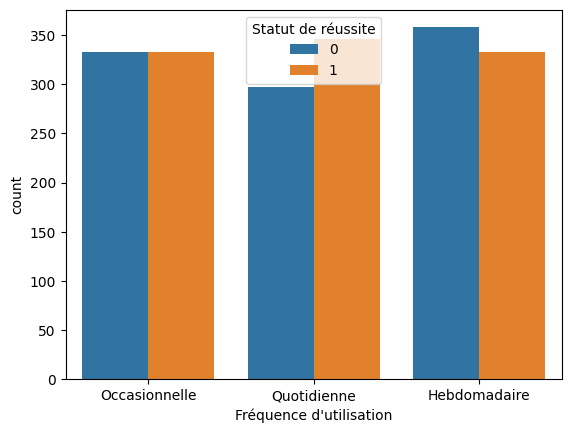

In [118]:
sns.countplot(x="Fréquence d'utilisation", hue='Statut de réussite', data=df)

<Axes: xlabel="Fréquence d'utilisation", ylabel='Statut de réussite'>

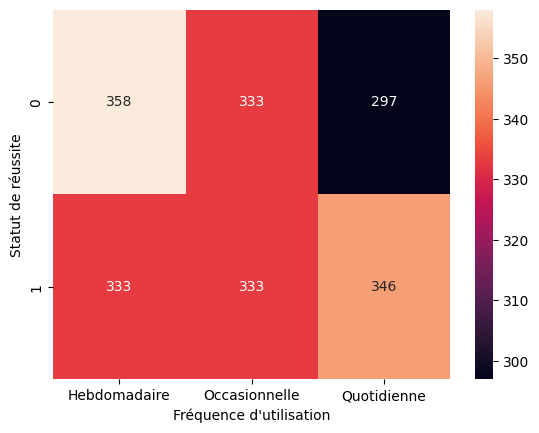

In [119]:
plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df["Fréquence d'utilisation"]), annot=True, fmt='d')

### Relation Target / Motivation

<Axes: xlabel='Impact sur la motivation', ylabel='count'>

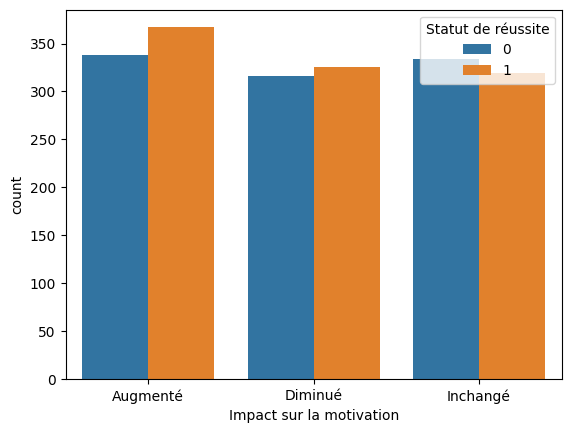

In [120]:
sns.countplot(x='Impact sur la motivation', hue='Statut de réussite', data=df)

### Relation Target / Usage

<Axes: xlabel='Usage de la connexion', ylabel='count'>

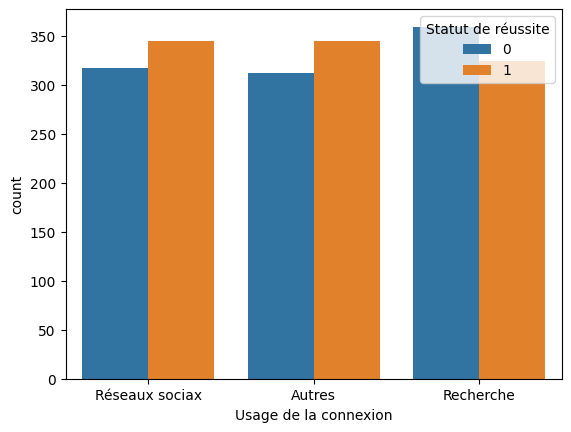

In [121]:
sns.countplot(x='Usage de la connexion', hue='Statut de réussite', data=df)

<Axes: xlabel='Usage de la connexion', ylabel='Statut de réussite'>

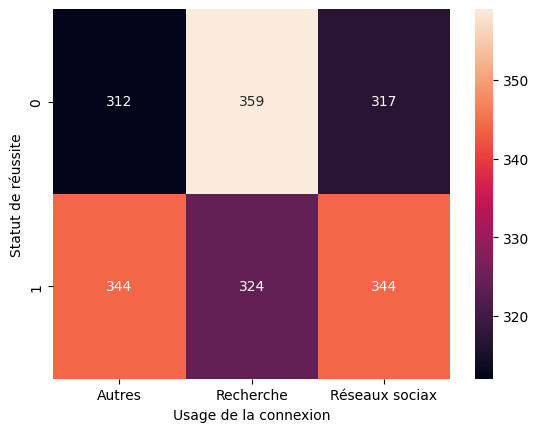

In [122]:

plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df['Usage de la connexion']), annot=True, fmt='d')

### Relation Target / Sexe

<Axes: xlabel='Sexe', ylabel='Statut de réussite'>

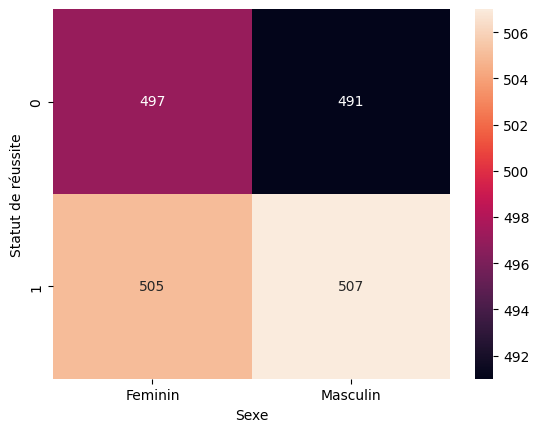

In [123]:
plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df['Sexe']), annot=True, fmt='d')

## Corrélation avec la variable cible

In [124]:
# Sélectionner uniquement les colonnes numériques et la colonne 'Mle' pour le calcul de la corrélation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculer la corrélation
correlation = numeric_df.corr()['Statut de réussite'].sort_values()

# Afficher la corrélation
print(correlation)


Temps d'étude/semaine (h)   -0.048239
Moyenne avant l'accès       -0.036181
Durée par session (min)     -0.002027
Moyenne actuelle             0.000269
Moyenne des notes            0.006884
Statut de réussite           1.000000
Name: Statut de réussite, dtype: float64


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   UFR                        2000 non-null   object 
 1   Filière                    2000 non-null   object 
 2   Sexe                       2000 non-null   object 
 3   Niveau                     2000 non-null   object 
 4   Fréquence d'utilisation    2000 non-null   object 
 5   Durée par session (min)    2000 non-null   int64  
 6   Impact sur la motivation   2000 non-null   object 
 7   Moyenne des notes          2000 non-null   float64
 8   Moyenne avant l'accès      2000 non-null   float64
 9   Moyenne actuelle           2000 non-null   float64
 10  Temps d'étude/semaine (h)  2000 non-null   int64  
 11  Usage de la connexion      2000 non-null   object 
 12  Statut de réussite         2000 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage:

## Relation Variable / Variable

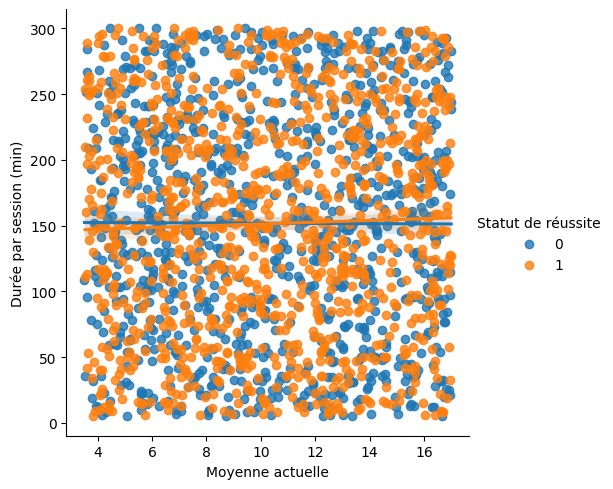

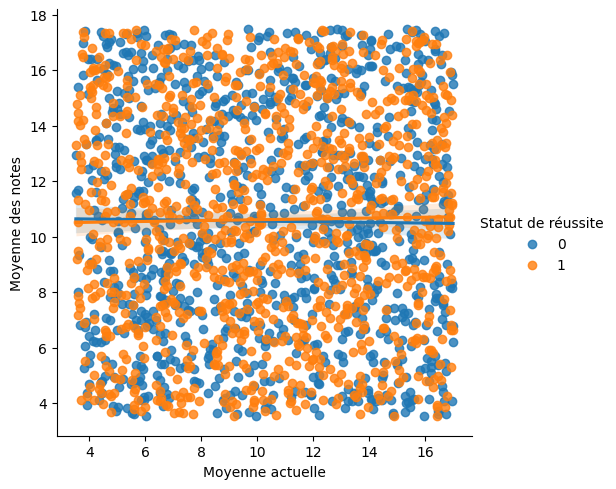

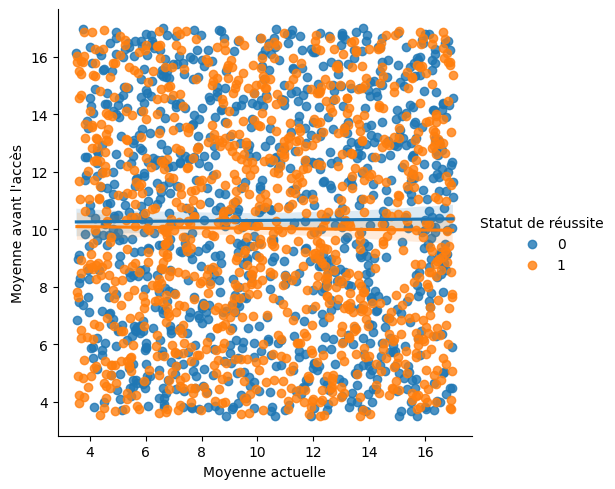

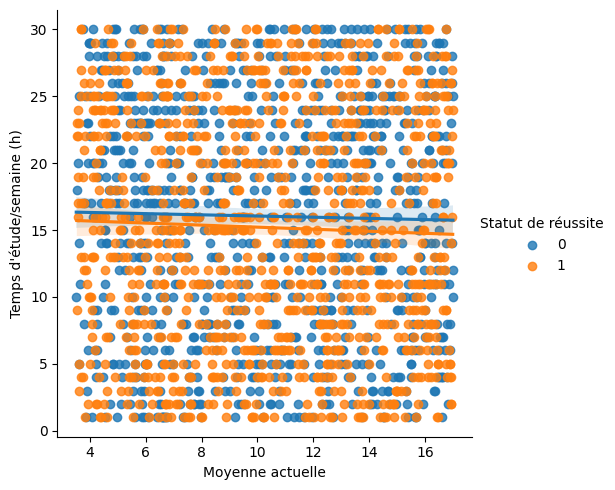

In [126]:
# Liste des colonnes à tracer
modules1 = ['Durée par session (min)', 'Moyenne des notes', "Moyenne avant l'accès", "Temps d'étude/semaine (h)"]

# Tracer un lmplot pour chaque colonne
for module in modules1:
    if df[module].dtype == 'object':
        try:
            df[module] = df[module].astype(float)
        except ValueError:
            print(f"La colonne {module} contient des valeurs non numériques.")
            continue
    sns.lmplot(x='Moyenne actuelle', y=module, hue='Statut de réussite', data=df)
    plt.show()  # Afficher le lmplot


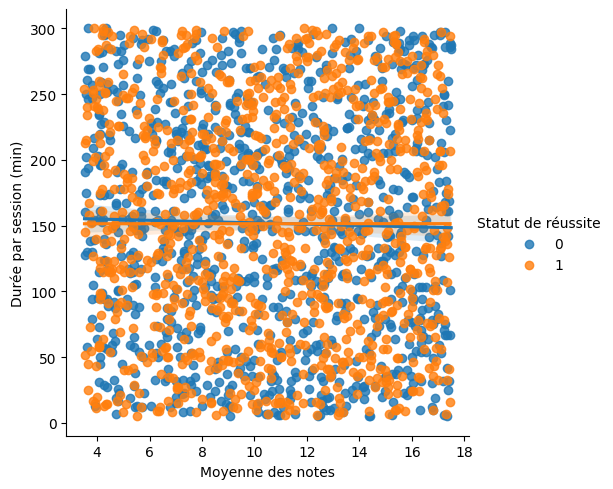

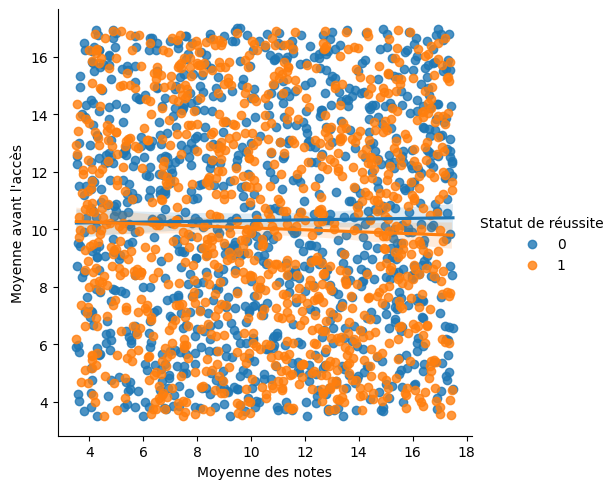

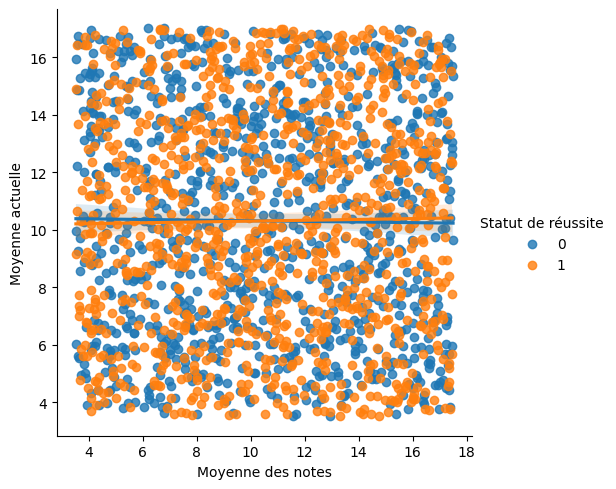

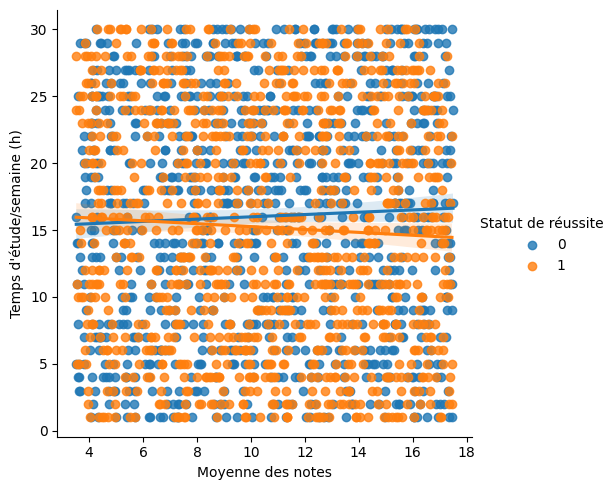

In [127]:
# Liste des colonnes à tracer
modules1 = ['Durée par session (min)', "Moyenne avant l'accès", 'Moyenne actuelle', "Temps d'étude/semaine (h)"]

# Tracer un lmplot pour chaque colonne
for module in modules1:
    if df[module].dtype == 'object':
        try:
            df[module] = df[module].astype(float)
        except ValueError:
            print(f"La colonne {module} contient des valeurs non numériques.")
            continue
    sns.lmplot(x='Moyenne des notes', y=module, hue='Statut de réussite', data=df)
    plt.show()  # Afficher le lmplot


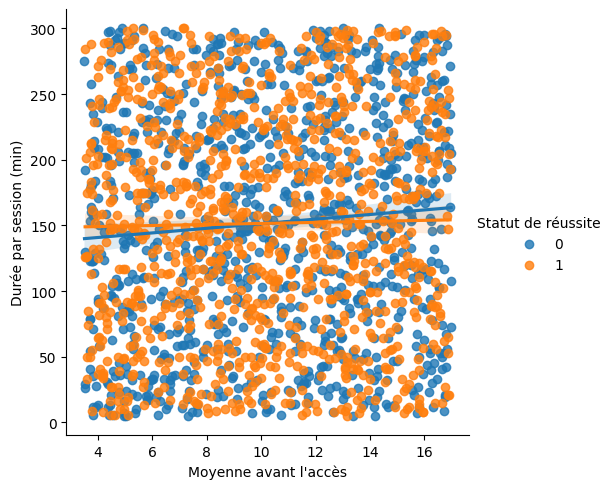

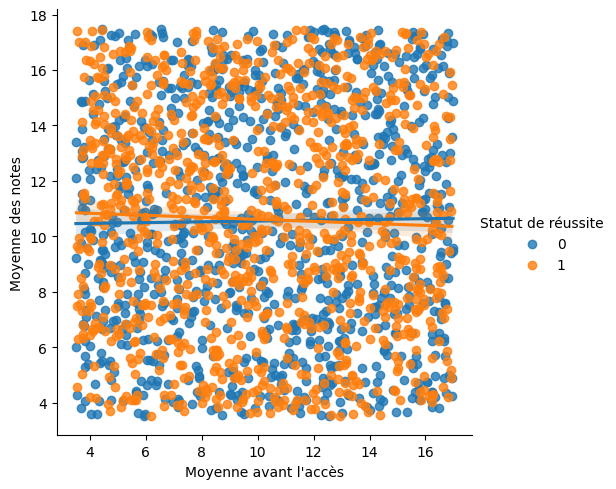

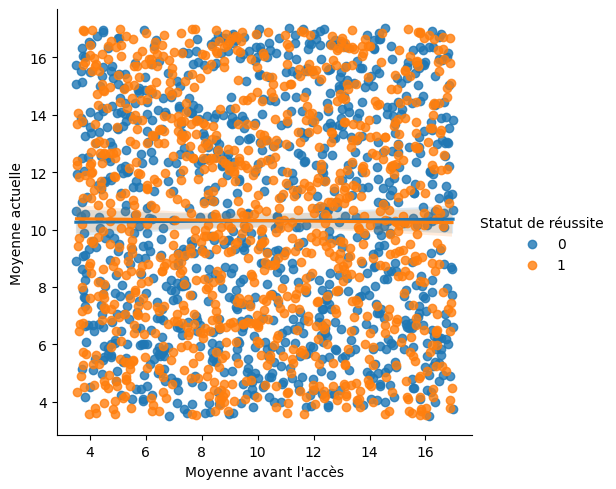

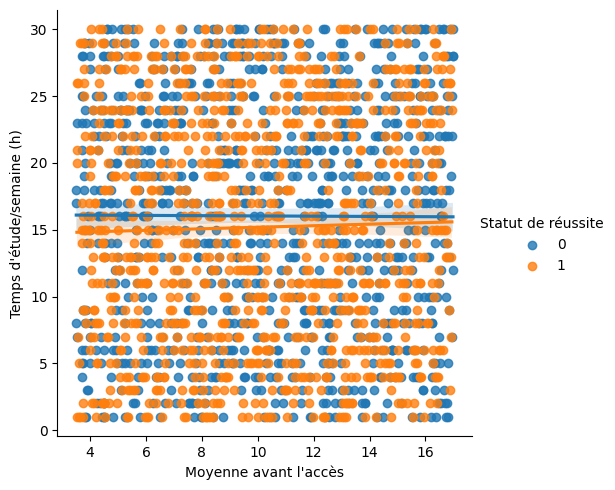

In [128]:
# Liste des colonnes à tracer
modules1 = ['Durée par session (min)', 'Moyenne des notes', 'Moyenne actuelle', "Temps d'étude/semaine (h)"]

# Tracer un lmplot pour chaque colonne
for module in modules1:
    if df[module].dtype == 'object':
        try:
            df[module] = df[module].astype(float)
        except ValueError:
            print(f"La colonne {module} contient des valeurs non numériques.")
            continue
    sns.lmplot(x="Moyenne avant l'accès", y=module, hue='Statut de réussite', data=df)
    plt.show()  # Afficher le lmplot


In [129]:
# Sélectionner uniquement les colonnes numériques et la colonne 'Mle' pour le calcul de la corrélation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculer la corrélation
correlation = numeric_df.corr()['Statut de réussite'].sort_values()

# Afficher la corrélation
print(correlation)

Temps d'étude/semaine (h)   -0.048239
Moyenne avant l'accès       -0.036181
Durée par session (min)     -0.002027
Moyenne actuelle             0.000269
Moyenne des notes            0.006884
Statut de réussite           1.000000
Name: Statut de réussite, dtype: float64


## Encodage - Nettoyage - TrainTest

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [131]:
df.head()

,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne des notes,Moyenne avant l'accès,Moyenne actuelle,Temps d'étude/semaine (h),Usage de la connexion,Statut de réussite
0,SEG,HA,Feminin,L3,Occasionnelle,179,Augmenté,7.131486,10.186278,16.147228,7,Réseaux sociax,1
1,ST,SVT,Feminin,L2,Quotidienne,145,Diminué,3.547731,12.618552,16.408861,11,Réseaux sociax,1
2,LSH,HA,Masculin,L2,Quotidienne,10,Augmenté,15.392803,4.821351,12.657355,8,Autres,1
3,SEG,MPCI,Masculin,L2,Occasionnelle,245,Augmenté,11.010319,5.627384,7.837539,21,Réseaux sociax,1
4,SEG,MPCI,Masculin,L2,Occasionnelle,36,Augmenté,9.919945,5.524963,4.105976,30,Autres,0


In [132]:
from sklearn.preprocessing import LabelEncoder

# Instanciation d'un encodeur
label_encoder = LabelEncoder()

# Sélection des colonnes à encoder
categorical_columns = ["UFR", "Filière", "Sexe", "Niveau", "Fréquence d'utilisation", "Impact sur la motivation", "Usage de la connexion"]

# Application de l'encodage sur chaque colonne catégorielle
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [133]:
df.head()

,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne des notes,Moyenne avant l'accès,Moyenne actuelle,Temps d'étude/semaine (h),Usage de la connexion,Statut de réussite
0,1,1,0,2,1,179,0,7.131486,10.186278,16.147228,7,2,1
1,2,6,0,1,2,145,1,3.547731,12.618552,16.408861,11,2,1
2,0,1,1,1,2,10,0,15.392803,4.821351,12.657355,8,0,1
3,1,3,1,1,1,245,0,11.010319,5.627384,7.837539,21,2,1
4,1,3,1,1,1,36,0,9.919945,5.524963,4.105976,30,0,0


In [134]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [135]:
trainset['Statut de réussite'].value_counts()

Statut de réussite
1    820
0    780
Name: count, dtype: int64

In [136]:
testset['Statut de réussite'].value_counts()

Statut de réussite
0    208
1    192
Name: count, dtype: int64

In [137]:
def preprocessing(df):
    
    X = df.drop('Statut de réussite', axis=1)
    y = df['Statut de réussite']
    
    print(y.value_counts())
    
    return X, y

In [138]:
X_train, y_train = preprocessing(trainset)

Statut de réussite
1    820
0    780
Name: count, dtype: int64


In [139]:
X_train.head()

,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne des notes,Moyenne avant l'accès,Moyenne actuelle,Temps d'étude/semaine (h),Usage de la connexion
582,0,5,1,1,1,121,1,8.811177,15.819895,16.883697,4,2
159,1,5,0,0,0,236,0,17.201576,16.664340,15.944203,15,2
1827,1,0,1,1,0,180,2,14.047140,15.286369,15.520994,12,0
318,0,1,0,1,0,242,1,9.073883,5.886761,4.043069,17,1
708,1,4,1,2,0,102,1,7.008042,16.543505,5.834745,12,0


In [140]:
X_test, y_test = preprocessing(testset)

Statut de réussite
0    208
1    192
Name: count, dtype: int64


# Modélisation

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import learning_curve




In [142]:
model_1 = RandomForestClassifier(random_state=0)
model_2 = AdaBoostClassifier(random_state=0)

## Procédure d'évaluation

In [143]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='Score d\'entraînement')
    plt.plot(N, val_score.mean(axis=1), label='Score de validation')
    plt.legend()
    plt.xlabel('Nombre d\'étudiants')
    plt.ylabel('Score du modèle')

[[ 96 112]
 [ 83 109]]
              precision    recall  f1-score   support

           0       0.54      0.46      0.50       208
           1       0.49      0.57      0.53       192

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.52      0.51      0.51       400



c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[ 94 114]
 [ 72 120]]
              precision    recall  f1-score   support

           0       0.57      0.45      0.50       208
           1       0.51      0.62      0.56       192

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.53       400
weighted avg       0.54      0.54      0.53       400



c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R alg

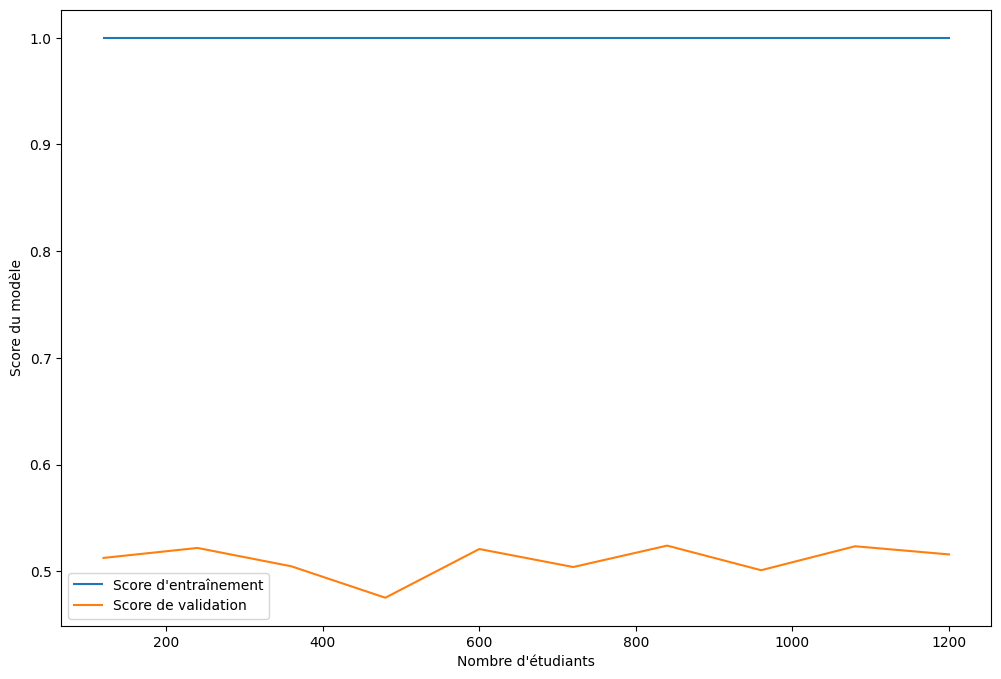

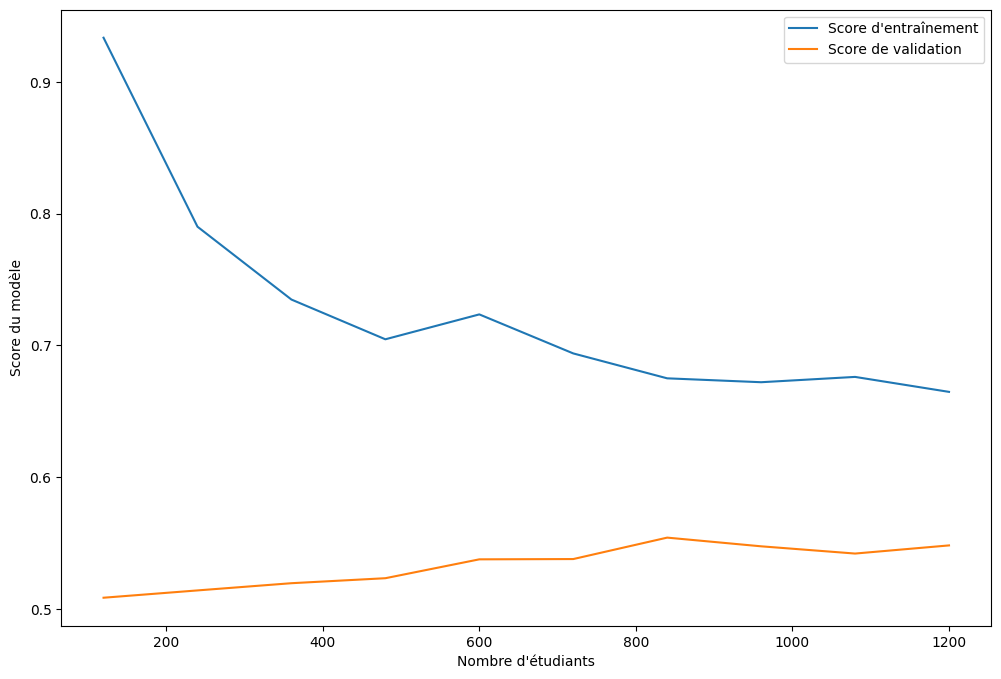

In [144]:
evaluation(model_1)
evaluation(model_2)

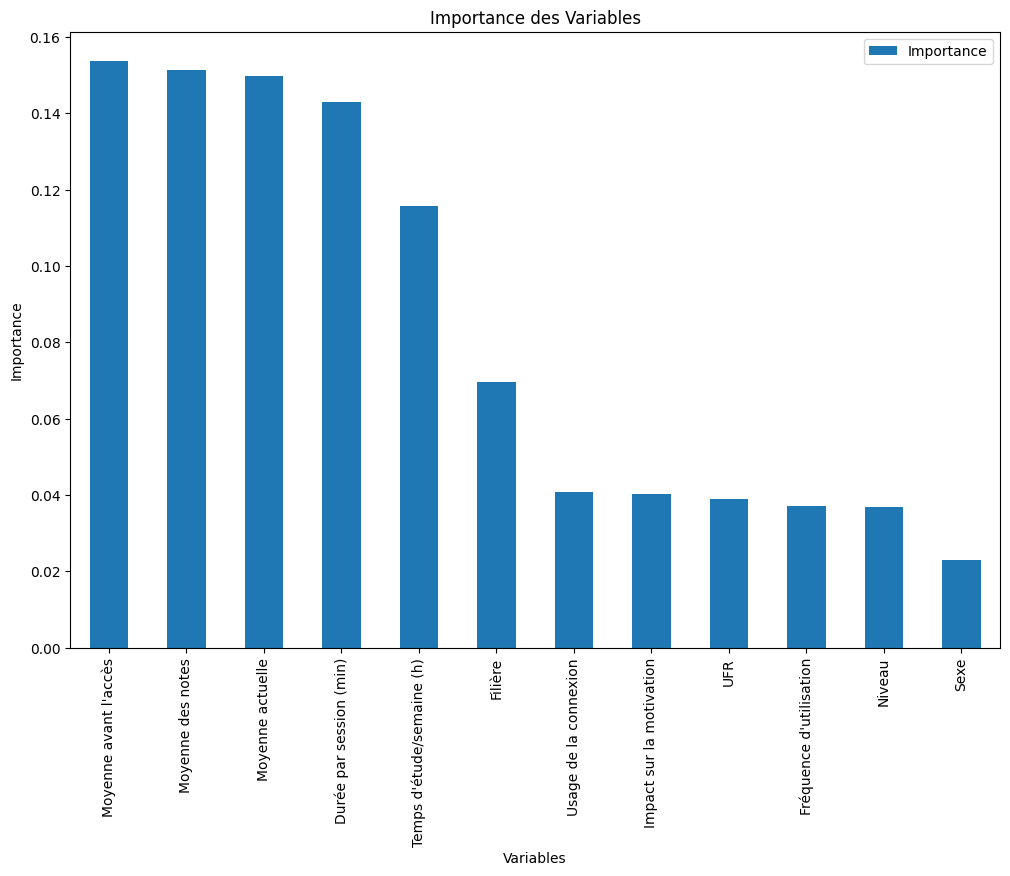

In [145]:
# Créer un DataFrame avec les importances des fonctionnalités
feature_importances_df = pd.DataFrame(model_1.feature_importances_, index=X_train.columns, columns=['Importance'])

# Trier les importances par ordre décroissant
feature_importances_df_sorted = feature_importances_df.sort_values(by='Importance', ascending=False)

# Tracer le graphique en barres
feature_importances_df_sorted.plot.bar(figsize=(12, 8))
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Importance des Variables')
plt.show()

In [146]:
feature_importances_df_sorted

,Importance
Moyenne avant l'accès,0.153674
Moyenne des notes,0.151409
Moyenne actuelle,0.149747
Durée par session (min),0.142869
Temps d'étude/semaine (h),0.115794
Filière,0.069508
Usage de la connexion,0.040861
Impact sur la motivation,0.040211
UFR,0.038976
Fréquence d'utilisation,0.037114


In [147]:
seuil = 0.070183
variables_selectionnees = feature_importances_df_sorted[feature_importances_df_sorted['Importance'] > seuil].index.to_list()


In [148]:
variables_selectionnees

["Moyenne avant l'accès",
 'Moyenne des notes',
 'Moyenne actuelle',
 'Durée par session (min)',
 "Temps d'étude/semaine (h)"]

In [149]:
X_train = X_train[variables_selectionnees]
X_test = X_test[variables_selectionnees]

In [150]:
X_test.head()

,Moyenne avant l'accès,Moyenne des notes,Moyenne actuelle,Durée par session (min),Temps d'étude/semaine (h)
405,8.178546,8.835950,15.596162,186,22
1190,3.921988,9.015889,12.523169,12,3
1132,9.917081,3.815322,12.011035,130,11
731,8.792489,10.876688,4.629248,136,3
1754,13.054716,11.066505,8.733697,82,16


## Entrainement du modèle

In [151]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [152]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
DecisionTree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))
LinearReg = LinearRegression()
NeuralNetwork = make_pipeline(preprocessor, StandardScaler(), MLPClassifier(random_state=0, max_iter=100))
LogisticReg = LogisticRegression()

In [153]:
dict_of_models = {
    'RandomForest': RandomForest,
    'AdaBoost': AdaBoost,
    'SVM': SVM,
    'KNN': KNN,
}

In [ ]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

RandomForest
[[ 91 117]
 [ 78 114]]
              precision    recall  f1-score   support

           0       0.54      0.44      0.48       208
           1       0.49      0.59      0.54       192

    accuracy                           0.51       400
   macro avg       0.52      0.52      0.51       400
weighted avg       0.52      0.51      0.51       400

AdaBoost


c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[ 82 126]
 [ 70 122]]
              precision    recall  f1-score   support

           0       0.54      0.39      0.46       208
           1       0.49      0.64      0.55       192

    accuracy                           0.51       400
   macro avg       0.52      0.51      0.51       400
weighted avg       0.52      0.51      0.50       400



c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R alg

In [ ]:
dict_of_models = {
    'DecisionTree': DecisionTree,
    'NeuralNetwork': NeuralNetwork,
}

In [ ]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [ ]:
def evaluation_2(model, task_type="classification"):
    """
    Évalue un modèle pour des tâches de classification ou de régression.
    
    :param model: Le modèle à évaluer
    :param task_type: "classification" ou "regression" pour ajuster l'évaluation
    """
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    if task_type == "classification":
        # Évaluation pour les modèles de classification
        print("Matrice de confusion :")
        print(confusion_matrix(y_test, ypred))
        print("\nRapport de classification :")
        print(classification_report(y_test, ypred))
    elif task_type == "regression":
        # Évaluation pour les modèles de régression
        rmse = np.sqrt(mean_squared_error(y_test, ypred))
        r2 = r2_score(y_test, ypred)
        print(f"RMSE : {rmse:.2f}")
        print(f"R² : {r2:.2f}")
    
    # Calcul des courbes d'apprentissage
    N, train_score, val_score = learning_curve(
        model, X_train, y_train, 
        cv=4, scoring="accuracy" if task_type == "classification" else "r2", 
        train_sizes=np.linspace(0.1, 1, 10)
    )
    
    # Affichage des courbes d'apprentissage
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label="Score d'entraînement")
    plt.plot(N, val_score.mean(axis=1), label="Score de validation")
    plt.legend()
    plt.xlabel("Nombre d'échantillons")
    plt.ylabel("Score du modèle")
    plt.title(f"Courbe d'apprentissage pour {type(model).__name__}")
    plt.show()

# Appel des évaluations
LinearReg = LinearRegression()
LogisticReg = LogisticRegression()

# Évaluation pour la régression
print("Évaluation de LinearRegression :")
evaluation(LinearReg, task_type="regression")

# Évaluation pour la classification
print("\nÉvaluation de LogisticRegression :")
evaluation_2(LogisticReg, task_type="classification")


# Optimisation

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform, loguniform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest


## SVM

In [ ]:
# Pipeline pour SVM
pipeline_svm = Pipeline([
    
    ('scaler', StandardScaler()),
    ('selectkbest', SelectKBest()),
    ('svc', SVC(random_state=0, probability=True))  # Activation des probabilités
])

# Hyperparamètres pour SVM
param_grid_svm = {
    'selectkbest__k': randint(1, X_train.shape[1]),  # Nombre de caractéristiques
    'svc__C': uniform(0.1, 10),
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto'],
    'svc__degree': randint(2, 4)  # Si le noyau est 'poly'
}


In [ ]:
# Initialiser RandomizedSearchCV
grid1 = RandomizedSearchCV(pipeline_svm, param_grid_svm, scoring='f1', cv=4, n_iter=40)

# Exécuter la recherche aléatoire sur la grille
grid1.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = grid1.predict(X_test)

In [ ]:
# Évaluer le meilleur modèle
evaluation(grid1.best_estimator_)

## Régression Logistique

In [ ]:
# Pipeline pour Logistic Regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('selectkbest', SelectKBest()),
    ('logreg', LogisticRegression(random_state=0))

    
])

# Hyperparamètres pour Logistic Regression
param_grid_lr = {
    'selectkbest__k': randint(1, X_train.shape[1]),  # Nombre de caractéristiques
    'logreg__C': uniform(0.1, 10),
    'logreg__penalty': ['l2', 'none'],
    'logreg__solver': ['lbfgs', 'saga'],
    'logreg__max_iter': randint(100, 500)
}

In [ ]:
# Initialiser RandomizedSearchCV
grid = RandomizedSearchCV(pipeline_lr, param_grid_lr, scoring='f1', cv=4, n_iter=40)

# Exécuter la recherche aléatoire sur la grille
grid.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = grid.predict(X_test)

In [ ]:
# Évaluer le meilleur modèle
evaluation_2(grid.best_estimator_)

In [ ]:
X_train.head()

In [ ]:
y_test.head()

## Model final

In [ ]:
model = grid1.best_estimator_

In [ ]:
notes_etudiant = [69,	4.746192,	7.981028,	9.524394,	23,	0]

# Utiliser le meilleur modèle pour faire des prédictions sur les données de l'étudiant
prediction_etudiant = model.predict([notes_etudiant])

# Afficher la prédiction
print(prediction_etudiant)

In [ ]:
# Faire des prédictions de probabilité avec le meilleur modèle
probabilites_predites = model.predict_proba([notes_etudiant])

# Convertir les probabilités en pourcentages
pourcentages_predits = (probabilites_predites * 100).round(2)

# Afficher les pourcentages prédits pour chaque classe
print("Pourcentages prédits pour la classe 0 :", pourcentages_predits[0][0])
print("Pourcentages prédits pour la classe 1 :", pourcentages_predits[0][1])


In [ ]:
# Sauvegarder le meilleur modèle pour une utilisation ultérieure
import joblib
joblib.dump(model, 'model.pkl')